In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Cars93.csv")
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Predicting Type

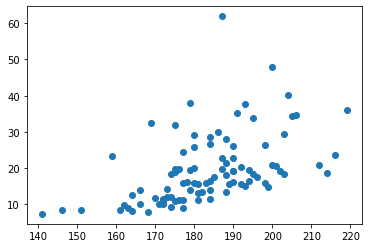

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df.Length, df.Price)

# OVERFITTING DRAWBACKS:
# -----------------------
# MODEL WILL PERFORM VERY GOOD IN TRAINING DATA
# WILL GIVE BAD PREDICTIONS FOR TESTING/UNSEEN DATA

In [5]:
y = df.Type
X = df[['Min.Price','Price','Max.Price','MPG.city','MPG.highway','AirBags','DriveTrain','Cylinders','EngineSize','Horsepower','RPM','Rev.per.mile','Man.trans.avail','Fuel.tank.capacity','Passengers','Length','Wheelbase','Width','Turn.circle','Rear.seat.room','Luggage.room','Weight','Origin','Make']]

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
model = dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[4 0 1 1 0 0]
 [0 2 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 1 0]
 [1 0 0 0 2 0]
 [0 0 0 0 0 3]]
0.7894736842105263


In [29]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(criterion='entropy', random_state=40)
tp = {'max_depth':range(2, 30), 'random_state':range(10, 100, 5)}
cv = GridSearchCV(dtc, tp, scoring='accuracy', cv=4)
cvmodel = cv.fit(X_train, y_train)
cvmodel.best_params_

{'max_depth': 4, 'random_state': 75}

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=75)
model = dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[4 0 1 1 0 0]
 [0 2 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [1 0 0 0 2 0]
 [0 0 0 0 0 3]]
0.8421052631578947


# Determining params using loop

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
df_accuracy = pd.DataFrame()
for i in range(2, 30, 1):
    for j in range(10, 100, 10):
        dtc = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=j)
        model = dtc.fit(X_train, y_train)
        pred = dtc.predict(X_test)
#         print(confusion_matrix(y_test, pred))
        df_accuracy = df_accuracy.append([[i, j, accuracy_score(y_test, pred)]])
#         print(i, j, accuracy_score(y_test, pred))
df_accuracy.columns = ['depth', 'random_state', 'acc']
df_accuracy[df_accuracy.acc==max(df_accuracy.acc)]

,depth,random_state,acc
0,4,10,0.842105
0,4,40,0.842105
0,4,60,0.842105
0,4,80,0.842105
0,5,10,0.842105
...,...,...,...
0,28,80,0.842105
0,29,10,0.842105
0,29,40,0.842105
0,29,60,0.842105


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')
model = dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[3 0 1 1 1 0]
 [0 2 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 1 0]
 [1 0 0 0 2 0]
 [0 0 0 0 0 3]]
0.7368421052631579


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
df_accuracy = pd.DataFrame()
for i in range(2, 30, 1):
    for j in range(10, 100, 10):
        dtc = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=j)
        model = dtc.fit(X_train, y_train)
        pred = dtc.predict(X_test)
#         print(confusion_matrix(y_test, pred))
        df_accuracy = df_accuracy.append([[i, j, accuracy_score(y_test, pred)]])
#         print(i, j, accuracy_score(y_test, pred))
df_accuracy.columns = ['depth', 'random_state', 'acc']
df_accuracy[df_accuracy.acc==max(df_accuracy.acc)]

,depth,random_state,acc
0,5,30,0.736842
0,5,50,0.736842
0,5,60,0.736842
0,5,90,0.736842
0,6,30,0.736842
...,...,...,...
0,29,30,0.736842
0,29,50,0.736842
0,29,60,0.736842
0,29,80,0.736842


In [47]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(criterion='gini')
tp = {'max_depth':range(2, 30), 'random_state':range(10, 100, 5)}
cv = GridSearchCV(dtc, tp, scoring='accuracy', cv=4)
cvmodel = cv.fit(X_train, y_train)
cvmodel.best_params_

{'max_depth': 7, 'random_state': 75}

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=75)
model = dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[3 0 1 1 1 0]
 [0 2 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [1 0 0 0 2 0]
 [0 0 0 0 0 3]]
0.7894736842105263
